In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, recall_score, cohen_kappa_score, classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Load and view raw data
df = pd.read_csv('insurance_claims.csv')




In [2]:
# Data preprocessing and exploration steps (omitted for brevity)

# Dropping columns
df = df.drop(columns=[
    'policy_number', 
    'insured_zip', 
    'policy_bind_date', 
    'incident_date', 
    'incident_location', 
    '_c39', 
    'auto_year', 
    'incident_hour_of_the_day'])

# Encode target variable
df['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
df['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)

# Handling missing values and categorical encoding (omitted for brevity)

# Selecting columns for modeling
X = df.drop(columns=['fraud_reported'])
y = df['fraud_reported']

# Encoding categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=None)

# Model selection and evaluation
models = []
models.append(('LR', LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('ADA', AdaBoostClassifier(n_estimators=100)))

# Evaluate each model
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.763750 (0.025890)
KNN: 0.713750 (0.048878)
DT: 0.790000 (0.048990)
SVM: 0.762500 (0.023049)
RF: 0.772500 (0.032500)
ADA: 0.800000 (0.031623)


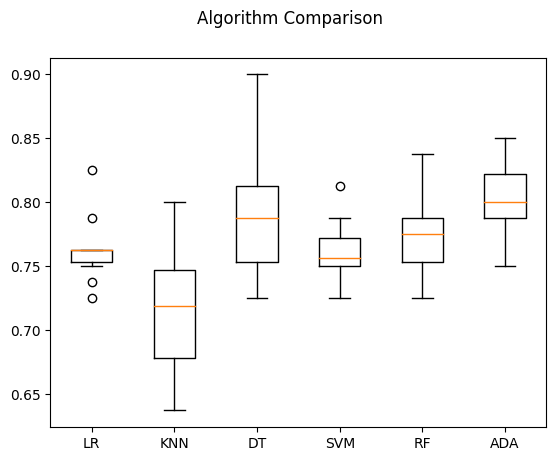

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    1.2s


Random Forest:
Accuracy:  71.0
Cohen Kappa:  0.005
Recall:  1.75

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.99      0.83       143
           1       0.33      0.02      0.03        57

    accuracy                           0.71       200
   macro avg       0.52      0.50      0.43       200
weighted avg       0.61      0.71      0.60       200



[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.0s finished


In [3]:
# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


rfc = RandomForestClassifier(criterion='gini', n_estimators=1000, verbose=1, n_jobs=-1, class_weight='balanced', max_features='sqrt')
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

print('Random Forest:')
print('Accuracy: ', round(accuracy_score(y_test, predictions) * 100, 2))
print('Cohen Kappa: ', round(cohen_kappa_score(y_test, predictions), 3))
print('Recall: ', round(recall_score(y_test, predictions) * 100, 2))
print('\nClassification Report:\n', classification_report(y_test, predictions))

